In [ ]:
!git clone https://github.com/wanghao14/Stain_Normalization.git

Cloning into 'Stain_Normalization'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 166 (delta 0), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (166/166), 71.34 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
import os
os.chdir(os.path.expanduser("./Stain_Normalization"))

In [ ]:
!pip install spams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spams: filename=spams-2.6.5.4-cp310-cp310-linux_x86_64.whl size=3931991 sha256=883dbedd976603f10a2e46c9bee887e52476965dbc121dbabcc788437f0fbe39
  Stored in directory: /root/.cache/pip/wheels/67/9d/1f/60a6c60785b07ad4f087297f04b723e665a97afcd5112ffb06
Successfully built spams


In [ ]:
import stain_utils as utils
import stainNorm_Macenko
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# i1=utils.read_image('./data/i1.png')
# i2=utils.read_image('./data/i2.png')
# i3=utils.read_image('./data/i3.png')
# i4=utils.read_image('./data/i4.png')
# i5=utils.read_image('./data/i5.png')
# i6=utils.read_image('./data/i6.png')

i1=utils.read_image('./data/Ref.png')
i2=utils.read_image('./data/TUM-SMFWWHHR.tif')

stack=utils.build_stack((i1,i2)) #,i3,i4,i5,i6))

ValueError: could not broadcast input array from shape (224,224,3) into shape (249,311,3)

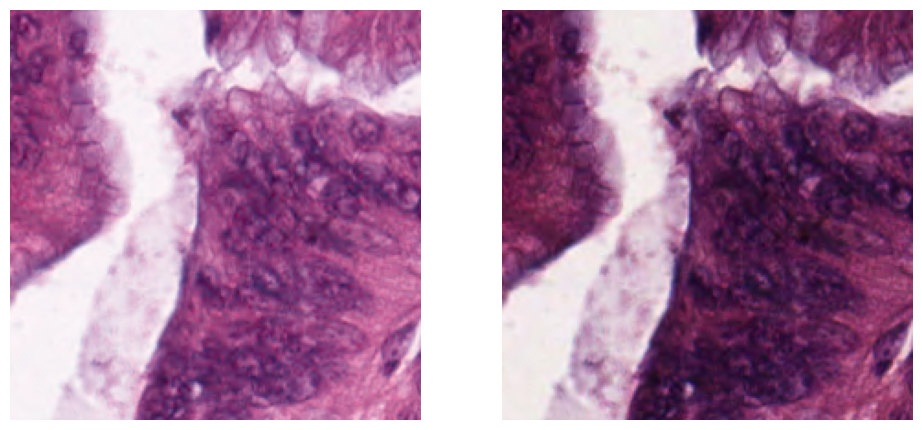

In [ ]:
utils.patch_grid(stack,width=3,save_name='./original.pdf')

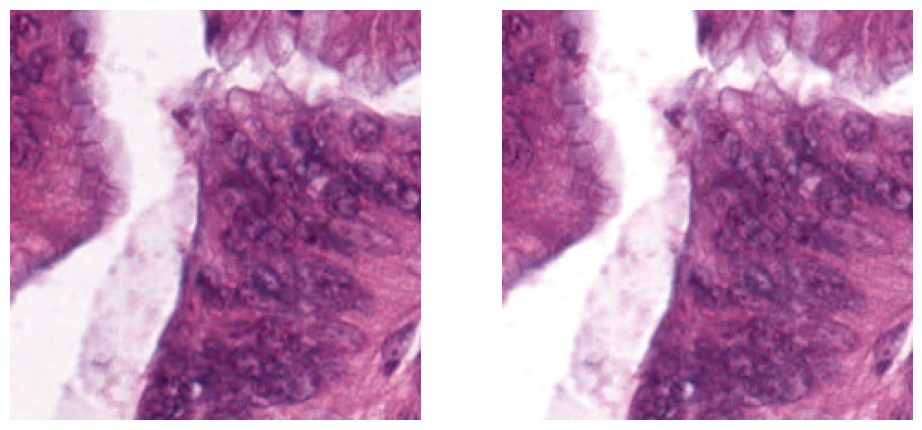

In [ ]:
n=stainNorm_Macenko.Normalizer()
n.fit(i1)

shouldBe=utils.read_image('./data/TUM-IISVQKGG.tif')


normalized=utils.build_stack((i1,n.transform(i2),shouldBe)) #,n.transform(i3),n.transform(i4),n.transform(i5),n.transform(i6)))
utils.patch_grid(normalized,width=3,save_name='./Macenko.pdf')

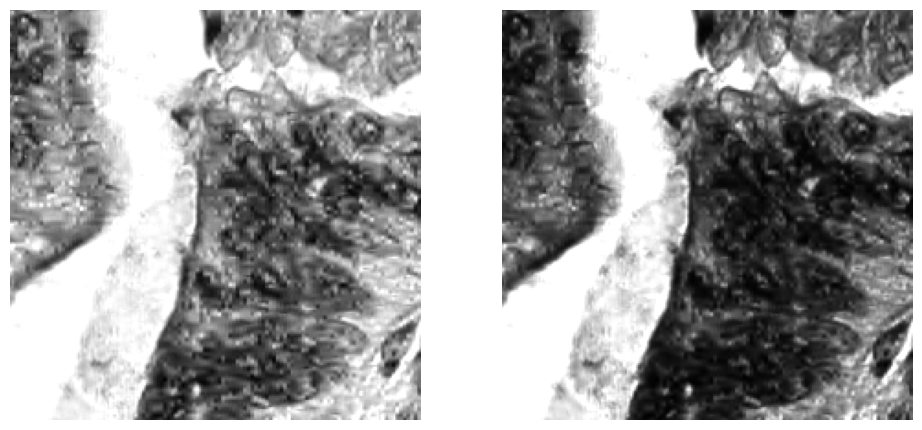

In [ ]:
hemo=utils.build_stack((n.hematoxylin(i1),n.hematoxylin(i2)))#,n.hematoxylin(i3),n.hematoxylin(i4),n.hematoxylin(i5),n.hematoxylin(i6)))
utils.patch_grid(hemo,width=3,save_name='./Macenko_hemo.pdf')